Columns in dataset: Index(['Order_ID', 'Product_Category', 'Product_Price', 'Customer_Age',
       'Rating', 'Review_Text', 'Order_Date'],
      dtype='object')
Order_ID             0
Product_Category    24
Product_Price       20
Customer_Age        15
Rating              25
Review_Text         21
Order_Date          10
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order_ID          505 non-null    int64  
 1   Product_Category  481 non-null    object 
 2   Product_Price     485 non-null    float64
 3   Customer_Age      490 non-null    float64
 4   Rating            480 non-null    float64
 5   Review_Text       484 non-null    object 
 6   Order_Date        495 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 27.7+ KB
None
Missing Data Percentage:
 Order_ID            0.000000
Product_Categor

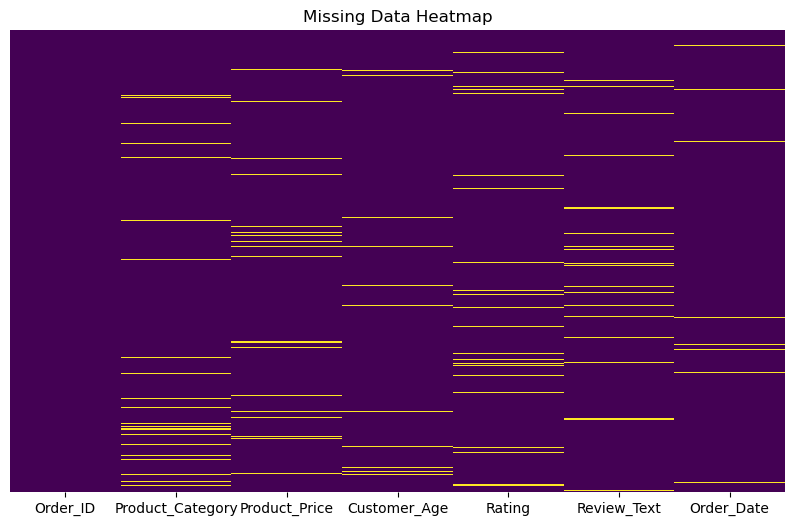

Summary Statistics After Imputation:
          Order_ID  Product_Price  Customer_Age      Rating
count  505.000000     505.000000    490.000000  480.000000
mean   249.899010    2441.872165     42.144898    3.197917
std    144.769438    1387.492747     14.901086    1.145198
min      1.000000     108.000000     18.000000    1.000000
25%    124.000000    1292.000000     30.000000    2.000000
50%    250.000000    2441.872165     41.000000    3.000000
75%    375.000000    3588.000000     55.000000    4.000000
max    500.000000    4993.000000     69.000000    5.000000


C:\Users\bachu\AppData\Local\Temp\ipykernel_27284\821284453.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)
C:\Users\bachu\AppData\Local\Temp\ipykernel_27284\821284453.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

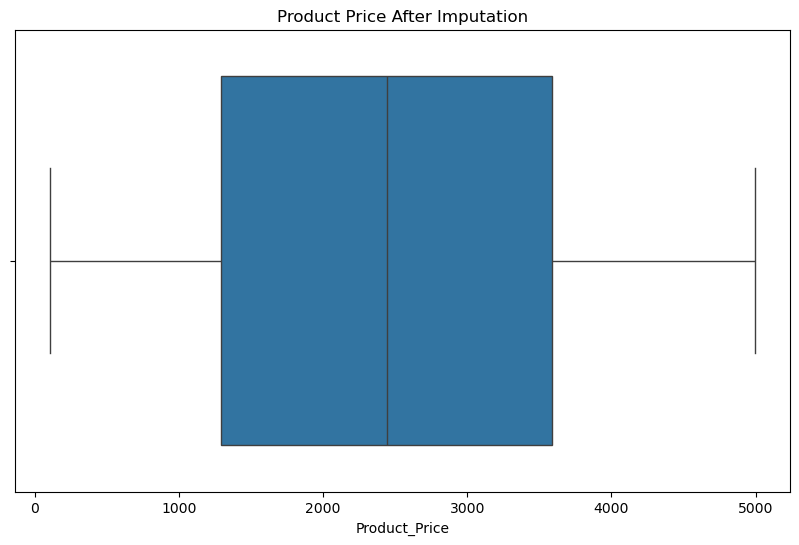

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
df = pd.read_csv('E-Commerce_Data.csv')
print("Columns in dataset:", df.columns)
print(df.isna().sum())
print(df.info())

# Compute percentage of missing value
missing_percentage = df.isna().sum() / len(df) * 100
print("Missing Data Percentage:\n", missing_percentage)

# Visualizing missing data patterns
plt.figure(figsize=(10, 6))
sns.heatmap(df.isna(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

# Handling Missing Data
if 'Product_Price' in df.columns:
    imputer = SimpleImputer(strategy='mean')
    df[['Product_Price']] = imputer.fit_transform(df[['Product_Price']])

if 'Product_Category' in df.columns:
    df['Product_Category'].fillna(df['Product_Category'].mode()[0], inplace=True)

if 'Order_Date' in df.columns:
    df['Order_Date'].fillna(method='ffill', inplace=True)

# KNN Imputation for complex cases
knn_imputer = KNNImputer(n_neighbors=5)
df[['Product_Price']] = knn_imputer.fit_transform(df[['Product_Price']])

# Compare summary statistics before and after imputation
print("Summary Statistics After Imputation:\n", df.describe())

# Visualizing impact of imputation
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Product_Price'])
plt.title("Product Price After Imputation")
plt.show()

# Final Data Export
df.to_csv('cleaned_ecommerce_orders.csv', index=False)